# Генетитческие алгоритмы 

## Рассмотрим идею генетического алгоритма на следующей задаче:
Диафантово уравнение - это уравнение вида 
$$P(x_1, ..., x_m) = 0,$$ 
где $P$ — целочисленная функция, например, полином с целыми коэффициентами, а переменные $x_{i}$ принимают целые значения

Общий вид линейного диофантова уравнения:
$$ a_1x_1 + a_2x_2 +...+a_kx_k=d$$

Десятая проблема Гильберта, сформулированная в 1900 году, состоит в нахождении алгоритма решения произвольных алгебраических диофантовых уравнений. В 1970 году Ю. В. Матиясевич доказал алгоритмическую неразрешимость этой проблемы

Общая теория решения таких уравнений отсутствует; частные случаи, такие как Гипотеза Каталана, были исследованы. Однако большинство из этих уравнений всё же удаётся решить специальными методами, такими как теорема Стёрмера или даже метод проб и ошибок (другими словами перебором)

Рассмотрим в качестве примера следующее уравнение: 
$$ a + 2b + 3c +4d = 30 $$
Очевидно, что поскольку мы ищем только целые положительные решения: $a,b,c,d \in [1,21]$

Вместо использования полного перебора, возьмём архитектуру генетических алгоритмов, где мы приближаемся от случайно выбранных решений к лучшим.

### Случайная генерация поколения хромосом 
Для начала выберем $k=5$ случайных решений: $a,b,c,d \in [1,21]$. Длина хромосомы $m$ = числу неизвестных в уравнении

Импортируем нужные библиотеки:
Pandas - для удобной работы с данными, matplotlib - для визуализации, numpy - для математики

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
data = np.random.randint(1, 21+1, (5,4))
df = pd.DataFrame(data, columns = ['a','b','c','d'])
df.head(5)

,a,b,c,d
0,3,15,10,21
1,16,9,2,3
2,3,7,5,11
3,20,1,17,19
4,1,19,12,3


### Вычисляем коэффициент выживаемости
Чтобы вычислить коэффициенты выживаемости (fitness), подставим каждое решение в выражение a+2b+3c+4d. Обратное число к невязке (модуль разности) от полученного значения до 30 и будет нужным значением, если невязка = 0, то возвращаем -1 и решение найдено

In [3]:
def fitness_func(chromosome): 
    if np.abs(chromosome[0] + 2 * chromosome[1] + 3 * chromosome[2] + 4 * chromosome[3] - 30) == 0: 
        return -1
    else: 
        return 1/np.abs(chromosome[0] + 2 * chromosome[1] + 3 * chromosome[2] + 4 * chromosome[3] - 30)
fitness = [fitness_func(chromosome) for chromosome in data]
df.insert(len(df.columns), "fitness",fitness, False)
df.head(5)

,a,b,c,d,fitness
0,3,15,10,21,0.008547
1,16,9,2,3,0.045455
2,3,7,5,11,0.021739
3,20,1,17,19,0.008403
4,1,19,12,3,0.017544


In [4]:
print("Средняя приспособленность (fitness):",np.sum(fitness)/5)

Средняя приспособленность (fitness): 0.020337581085999444


Необходим генератор, где сильные хромосомы (т.е. те, у которых коэффициент выживаемости как можно больше) выпадают чаще. 
Пусть у нас есть следующие хромосомы:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>a</th>
      <th>b</th>
      <th>c</th>
      <th>d</th>
      <th>fitness</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>18</td>
      <td>4</td>
      <td>12</td>
      <td>18</td>
      <td>0.0096</td>
    </tr>
    <tr>
      <th>1</th>
      <td>16</td>
      <td>9</td>
      <td>18</td>
      <td>11</td>
      <td>0.0098</td>
    </tr>
    <tr>
      <th>2</th>
      <td>7</td>
      <td>4</td>
      <td>10</td>
      <td>17</td>
      <td>0.012</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>8</td>
      <td>1</td>
      <td>6</td>
      <td>0.0588</td>
    </tr>
    <tr>
      <th>4</th>
      <td>7</td>
      <td>5</td>
      <td>19</td>
      <td>14</td>
      <td>0.01</td>
    </tr>
  </tbody>
</table>

Тривиально, чтобы сгенерировать вероятности выбора хромосомы пропорционально коэффициенту выживаемости воспользуемся следующей формулой:
$$ p_i = \frac{{fitness}_i}{\sum_{j=0}^{k}{fitness}_j}, i=0,1,...,k$$
где $k$ - количество хромосом

Получим: 
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>a</th>
      <th>b</th>
      <th>c</th>
      <th>d</th>
      <th>fitness</th>
      <th>$p_i$</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>18</td>
      <td>4</td>
      <td>12</td>
      <td>18</td>
      <td>0.0096</td>
      <td>0.0959</td> 
    </tr>
    <tr>
      <th>1</th>
      <td>16</td>
      <td>9</td>
      <td>18</td>
      <td>11</td>
      <td>0.0098</td>
      <td>0.0977</td>
    </tr>
    <tr>
      <th>2</th>
      <td>7</td>
      <td>4</td>
      <td>10</td>
      <td>17</td>
      <td>0.012</td>
      <td>0.120</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>8</td>
      <td>1</td>
      <td>6</td>
      <td>0.0588</td>
      <td>0.5865</td>  
    </tr>
    <tr>
      <th>4</th>
      <td>7</td>
      <td>5</td>
      <td>19</td>
      <td>14</td>
      <td>0.01</td>
      <td>0.0997</td>
    </tr>
  </tbody>
</table>


In [5]:
probabilities = [fit/np.sum(fitness) for fit in fitness]
df.insert(len(df.columns), "$p_i$", probabilities, False)
df.head(5)

,a,b,c,d,fitness,$p_i$
0,3,15,10,21,0.008547,0.084051
1,16,9,2,3,0.045455,0.447001
2,3,7,5,11,0.021739,0.213783
3,20,1,17,19,0.008403,0.082639
4,1,19,12,3,0.017544,0.172527


### Нахождим родителей
Нам нужно найти $k=5$ новых потомков. Для этого мы случайно выбираем мать (вероятность выбора матери среди всех генов равна найденной на предыдущем шаге) и к ней в пару из оставшихся генов случайно выбираем отца (вероятность выбора отца среди всех генов за исключением гена матери, равна найденной на предыдущем шаге).

Пары: 
- мать - отец 
- отец - мать

разные


Будем считать, что наши хромосомы полигамны, поэтому у каждого генома может быть несколько пар

Все $k$ пар должны быть различны. 
Всего различных пар существует $2C_k^2$

In [6]:
parents = [] 
parents_count = 0 
while parents_count < 5: 
    mother = np.random.choice(df.index, 1, p=probabilities)[0]
    father = np.random.choice(df.index, 1, p=probabilities)[0]
    if mother != father and not [mother,father] in parents: 
        parents.append([mother,father])
        parents_count += 1
print(parents)

[[1, 4], [4, 1], [2, 4], [4, 2], [3, 2]]


### Скрещиваем родителей - получаем потомков
Оператор скрещивание (crossover) осуществляет обмен частями хромосом между двумя хромосомами в популяции. Может быть одноточечным или многоточечным. Одноточечный кроссовер работает следующим образом:

Сначала, случайным образом выбирается одна из $m-1$ ($m$ - это длина хромосомы) точек разрыва. 

Точка разрыва - участок между соседними значениями в хромосоме. Обе родительские структуры разрываются на два сегмента по этой точке. Затем, соответствующие сегменты различных родителей склеиваются и получаются генотип потомка.
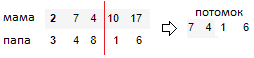

In [7]:
descendants = np.empty((0,4), int)
for couples in parents:
    descedand = []
    splitting_point = random.randint(1, 4-1)
#     print("мама", data[couples[0]],"папа",data[couples[1]],"точка разрыва =",splitting_point)
    descendant = np.concatenate((data[couples[0]][:splitting_point], data[couples[1]][splitting_point:]), axis=0)
#     print ("потомок", np.array([descendant]))
    descendants = np.append(descendants,np.array([descendant]),axis = 0)
print(descendants)

[[16  9 12  3]
 [ 1  9  2  3]
 [ 3 19 12  3]
 [ 1 19 12 11]
 [20  7  5 11]]


In [8]:
descendants_df = pd.DataFrame(descendants, columns = ['a','b','c','d'])
descendants_df.head(5)

,a,b,c,d
0,16,9,12,3
1,1,9,2,3
2,3,19,12,3
3,1,19,12,11
4,20,7,5,11


### Вычислим коэффициенты выживаемости (fitness) потомков

In [9]:
descendants_fitness = [fitness_func(chromosome) for chromosome in descendants]
descendants_df.insert(len(descendants_df.columns), "fitness", descendants_fitness, False)
descendants_df.head(5)

,a,b,c,d,fitness
0,16,9,12,3,0.019231
1,1,9,2,3,0.142857
2,3,19,12,3,0.016949
3,1,19,12,11,0.011236
4,20,7,5,11,0.015873


In [10]:
print("Средняя приспособленность (fitness):", np.sum(descendants_fitness)/5)

Средняя приспособленность (fitness): 0.04122920711189612


### Мутация 
Находим среди потомков - хромосому с наименьшим коэффициентом выживаемости. Меняем гены случайным образом пока коэффициент выживаемости не станет больше, чем был до мутации 

In [11]:
# Находим самого нежизнеспособного потомка
mutant = descendants_df[descendants_df['fitness']==descendants_df['fitness'].min()]
mutant.head(1)

,a,b,c,d,fitness
3,1,19,12,11,0.011236


In [12]:
# меняем пока коэффициент выживаемости не станет больше
while True: 
    mutant_chromosome = np.random.randint(1, 21+1, (1,4))
#     print(mutant_chromosome[0])
    if fitness_func(mutant_chromosome[0]) > (descendants_df['fitness'].min()): 
        break
mutant_chromosome = np.append(mutant_chromosome,fitness_func(mutant_chromosome[0]))
print(mutant_chromosome)

[1.0000000e+00 1.1000000e+01 6.0000000e+00 1.5000000e+01 1.4084507e-02]


In [13]:
# удаляем хромосому из датафрейма
descendants_df = descendants_df.drop(np.where(descendants_df['fitness'] == descendants_df['fitness'].min())[0])
# вставляем нашего мутанта
descendants_df = descendants_df.append(pd.DataFrame(np.array([mutant_chromosome]), columns = ['a','b','c','d','fitness']), ignore_index=True)
descendants_df.head(10)

,a,b,c,d,fitness
0,16.0,9.0,12.0,3.0,0.019231
1,1.0,9.0,2.0,3.0,0.142857
2,3.0,19.0,12.0,3.0,0.016949
3,20.0,7.0,5.0,11.0,0.015873
4,1.0,11.0,6.0,15.0,0.014085


### Генерируем следующее поколение 
Выживет $k$ самых сильных особей среди родителей и потомков 

In [14]:
# удалим столбец вероятности из таблицы родителей
df = df.drop(columns = ['$p_i$'],axis = 1)
# объеденим два датафрейма, чтобы найти 5 хромосом с наибольшим коэффициентом выживаемости 
df = df.append(descendants_df, ignore_index=True)
df.head(10)

,a,b,c,d,fitness
0,3.0,15.0,10.0,21.0,0.008547
1,16.0,9.0,2.0,3.0,0.045455
2,3.0,7.0,5.0,11.0,0.021739
3,20.0,1.0,17.0,19.0,0.008403
4,1.0,19.0,12.0,3.0,0.017544
5,16.0,9.0,12.0,3.0,0.019231
6,1.0,9.0,2.0,3.0,0.142857
7,3.0,19.0,12.0,3.0,0.016949
8,20.0,7.0,5.0,11.0,0.015873
9,1.0,11.0,6.0,15.0,0.014085


In [15]:
sorted_df = df.sort_values(by='fitness', ascending = False)
df = sorted_df.head(5)
df.head(10)

,a,b,c,d,fitness
6,1.0,9.0,2.0,3.0,0.142857
1,16.0,9.0,2.0,3.0,0.045455
2,3.0,7.0,5.0,11.0,0.021739
5,16.0,9.0,12.0,3.0,0.019231
4,1.0,19.0,12.0,3.0,0.017544


### Критерий останова 
Критерий останова: когда найдется хотябы одна хромосома с коэффициентом выживаемости = -1

In [16]:
numpy_array = df.to_numpy()

In [17]:
print(numpy_array)

[[1.00000000e+00 9.00000000e+00 2.00000000e+00 3.00000000e+00
  1.42857143e-01]
 [1.60000000e+01 9.00000000e+00 2.00000000e+00 3.00000000e+00
  4.54545455e-02]
 [3.00000000e+00 7.00000000e+00 5.00000000e+00 1.10000000e+01
  2.17391304e-02]
 [1.60000000e+01 9.00000000e+00 1.20000000e+01 3.00000000e+00
  1.92307692e-02]
 [1.00000000e+00 1.90000000e+01 1.20000000e+01 3.00000000e+00
  1.75438596e-02]]
